<a href="https://colab.research.google.com/github/Prateek-Poonia/E-commerce-product-Recommender-Systems/blob/main/E-Commerce%20Product%20recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv("/content/ratings_Electronics.csv", names=['userId','productId','rating','timestamp'])

In [ ]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [ ]:
df.shape

(7824482, 4)

In [ ]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

Since the dataset is too big and it will difficult to analyze the entire dataset due to limited resources,that's why i am randomly taking 20% of the data as sample out of the whole dataset which is 1564896

In [ ]:
electronics_data = df.sample(n=1564896, ignore_index=True)

In [ ]:
del df

In [ ]:
electronics_data.head()

,userId,productId,rating,timestamp
0,A2F1KXVGX5GVW4,B000GGQ2ZU,1.0,1205798400
1,A23SXDT32SO62L,B00F4PRKDG,1.0,1394582400
2,A8CKUMBF3WEDY,B0019EHU8G,5.0,1386806400
3,A3XK1ITK8ZB3O,B007KZQM8W,5.0,1399852800
4,A2SGI279JYW8QA,B000ID7QNI,4.0,1357171200


In [ ]:
electronics_data.shape

(1564896, 4)

In [ ]:
# concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [ ]:
# drop the timestamp columns
electronics_data.drop('timestamp', axis = 1,inplace=True)

In [ ]:
# Getting statistical data
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.014728e+00
std,1.379242e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


As we can see minimum rating is 1 and maximum rating is 5 and average rating of the products is around 4.

In [ ]:
# Handle missing value
electronics_data.isnull().sum()

,0
userId,0
productId,0
rating,0


In [ ]:
# handling duplicates records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [ ]:
electronics_data.head()

,userId,productId,rating
0,A2F1KXVGX5GVW4,B000GGQ2ZU,1.0
1,A23SXDT32SO62L,B00F4PRKDG,1.0
2,A8CKUMBF3WEDY,B0019EHU8G,5.0
3,A3XK1ITK8ZB3O,B007KZQM8W,5.0
4,A2SGI279JYW8QA,B000ID7QNI,4.0


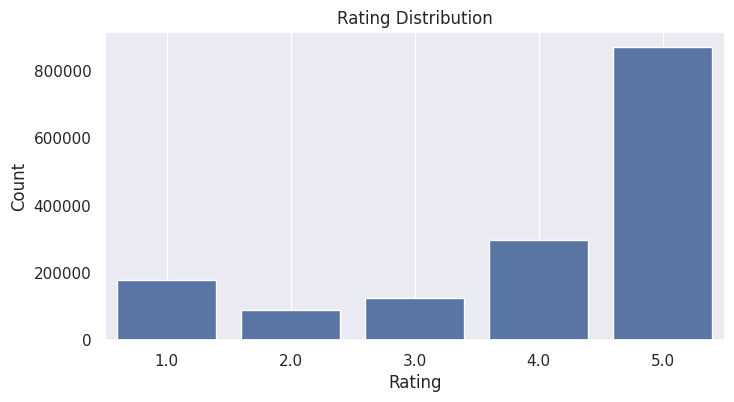

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating', data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

Most of the user have given 5 rating.

In [ ]:
print(f"Total rating :  {electronics_data.shape[0]}")
print(f"Total unique users : {electronics_data['userId'].unique().shape[0]}")
print(f"Total unique products : {electronics_data['productId'].unique().shape[0]}")

Total rating :  1564896
Total unique users : 1225421
Total unique products : 237237


Analyzing Rating By user

In [ ]:
no_of_rated_product_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_product_per_user.head()

,rating
userId,
A5JLAU2ARJ0BO,103
ADLVFFE4VBT8,98
A3OXHLG6DIBRW8,92
A6FIAB28IS79,89
A1ODOGXEYECQQ8,78


In [ ]:
print(f"No of rated product more than 50 per user : {sum(no_of_rated_product_per_user >= 50)}")

No of rated product more than 50 per user : 25


**POPULARITY BASED RECOMMENDATIONS**



Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

In [ ]:
data = electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [ ]:
data.head()

,userId,productId,rating
2,A8CKUMBF3WEDY,B0019EHU8G,5.0
4,A2SGI279JYW8QA,B000ID7QNI,4.0
9,A1HFH22W6TDCKD,B004RKQM8I,2.0
11,A312IAWRPUG51C,B00008SCFL,5.0
15,A1YN15FG9L40ZS,B00008SCFL,1.0


In [ ]:
no_of_rating_per_product = data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [ ]:
no_of_rating_per_product.head()

,rating
productId,
B0074BW614,3642
B00DR0PDNE,3302
B007WTAJTO,2790
B0019EHU8G,2507
B006GWO5WK,2409


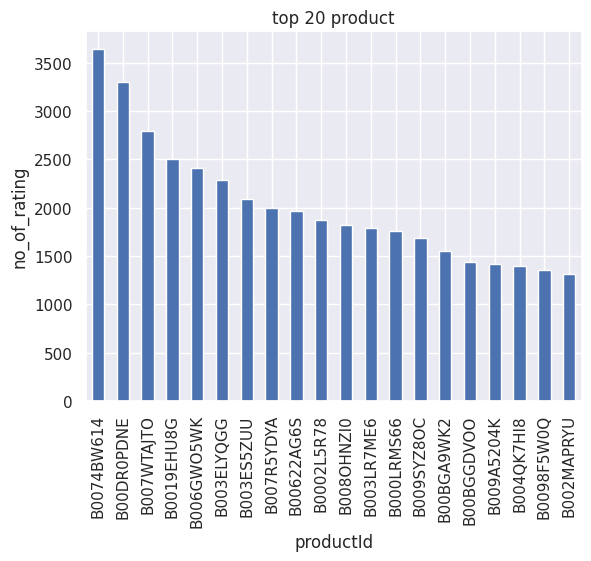

In [ ]:
# Top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('productId')
plt.ylabel('no_of_rating')
plt.title('top 20 product')
plt.show()

In [ ]:
# average rating product
average_rating_product_count = pd.DataFrame(data.groupby('productId')['rating'].mean())

In [ ]:
average_rating_product_count

,rating
productId,
0972683275,4.482234
1400532655,3.725275
140053271X,4.080460
9573212919,4.072727
B00000DM9W,4.591549
...,...
B00INNP5VU,3.937824
B00IO1V33U,4.464286
B00IT1WJZQ,4.500000


In [ ]:
average_rating_product_count['ratings_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [ ]:
average_rating_product_count.head()

,rating,ratings_counts
productId,,
0972683275,4.482234,197
1400532655,3.725275,91
140053271X,4.080460,87
9573212919,4.072727,55
B00000DM9W,4.591549,71


In [ ]:
# highest average rating product
average_rating_product_count[average_rating_product_count['ratings_counts'] == average_rating_product_count['ratings_counts'].max()]

,rating,ratings_counts
productId,,
B0074BW614,4.502746,3642


In [ ]:
# Minimum Average rating product
print(f"Minimum average rating product : {average_rating_product_count['ratings_counts'].min()}")
print(f"Total Minimum average rating products: {average_rating_product_count[average_rating_product_count['ratings_counts'] == average_rating_product_count['ratings_counts'].min()].shape[0]}")

Minimum average rating product : 50
Total Minimum average rating products: 117


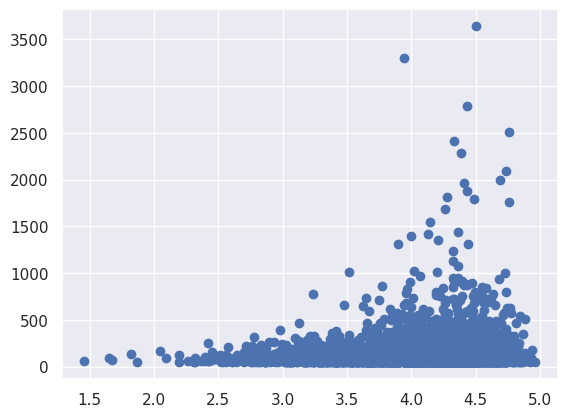

In [ ]:
# scatter plot
plt.scatter(x = average_rating_product_count['rating'],y=average_rating_product_count['ratings_counts'])
plt.show()

**Collaberative filtering (Item-Item recommedation)**

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [ ]:
# import surprise library for collabrative filtering
!pip install scikit-surprise
check_and_install_library('surprice')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357283 sha256=31896e7459c62f4fca226d7f70fa4f3d3f28d66ba1a70a5ddedb6f7180d4e043
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise
surprice is not installed. Installing....


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


ERROR: Could not find a version that satisfies the requirement surprice (from versions: none)


ERROR: No matching distribution found for surprice


In [ ]:
# Reading the dataset
reader = Reader(rating_scale=(1,5))
surprise_data = Dataset.load_from_df(data, reader)

In [ ]:
# spiltting surprise the dataset into 70,30 ration using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3, random_state=42)

In [ ]:
algo = KNNWithMeans(k = 5, sim_options = {'name':'pearson_baseline', 'user_based':False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
#make prediction using dataset
test_pred = algo.test(testset)

In [ ]:
# print RMSE
print("Item-based Model : Test set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test set
RMSE: 1.3063


1.3063345750319837

**Model-based collaborative filtering system**

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [ ]:
data2 = data.sample(20000)
ratings_matrix = data2.pivot_table(values ='rating', index='userId',columns='productId',fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JI4F,B00000K2YR,B00001P4XA,B00001P4XH,...,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00IF70QCW,B00IGISO9C,B00INNP5VU,B00IO1V33U,B00IT1WJZQ,B00IVPU786,B00J46VVKE
userId,,,,,,,,,,,,,,,,,,,,,
A001412229RSF8NQJ2CZY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00672273FVQW6ZER2UE3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A017408633KRQ6FHC7ERP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0233181IP7FSU6TYQH3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A02454132PDISAIV8XZW1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Above we have created a pivot table of the rating where the value of the column will rating and index be userId and the column name will be productId

In [ ]:
# shape of the rating matrix
ratings_matrix.shape

(19906, 4444)

In [ ]:
# Transpose of the matrix to make column(productId) as index as column(userId)
x_ratings_matrix = ratings_matrix.T
x_ratings_matrix.head()

userId,A001412229RSF8NQJ2CZY,A00672273FVQW6ZER2UE3,A017408633KRQ6FHC7ERP,A0233181IP7FSU6TYQH3,A02454132PDISAIV8XZW1,A02597291FH12TFIFU9JZ,A03299993GLHG3GY0QDI5,A0406602131K3BWV9HHVI,A04338862ETV79DXTHMAG,A05184873IXK36JCUOM21,...,AZX0MB8PXMD2N,AZXX2IV3T43M2,AZYBPE4TUFF2Q,AZYIIFN89B8HV,AZYIPO42ISMQT,AZYJE40XW6MFG,AZYKIAD6MJ9UU,AZZ5ASC403N74,AZZP1X6ER8SMN,AZZRRXOJFC0H4
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000DM9W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000J061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_ratings_matrix.shape

(4444, 19906)

In [ ]:
# Decomposition of the matrix using singular value decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix

array([[-8.89102284e-07,  9.15788930e-07,  5.93472203e-07, ...,
         3.57551746e-06,  7.93331624e-06,  3.84388154e-06],
       [ 6.14297142e-10, -4.17573117e-10,  1.76627298e-09, ...,
        -1.37469943e-09,  1.28962504e-09,  2.44927961e-09],
       [-4.32280339e-11, -4.81552764e-11, -1.68498956e-10, ...,
        -4.80431991e-11,  5.62663674e-11,  7.63623984e-10],
       ...,
       [-1.07330916e-09,  3.81253810e-12, -1.80857361e-09, ...,
        -5.15754147e-09, -9.47521056e-10,  4.84861314e-09],
       [-1.37896157e-09, -2.22653706e-09, -1.79563402e-08, ...,
        -2.66559808e-08, -1.20668801e-09,  2.71448377e-08],
       [ 1.39640570e-10,  4.34632633e-11,  3.44504827e-10, ...,
        -3.61612351e-10,  4.27118463e-10,  4.52072800e-10]])

In [ ]:
#correlation matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4444, 4444)

In [ ]:
x_ratings_matrix.index[10]

'B00001P4ZH'

In [ ]:
i = 'B00001P4XH'
product_name = list(x_ratings_matrix.index)
product_id = product_name.index(i)
print(product_id)

9


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4444,)

In [ ]:
correlation_matrix[correlation_product_ID>0.75].shape

(184, 4444)

In [ ]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00001P4XH',
 'B00001W0EQ',
 'B00004XOM3',
 'B000056SSM',
 'B00006HYKM',
 'B00006IS4X',
 'B00007M1TZ',
 'B000092TT0',
 'B0000AI0N1',
 'B0000BZOGJ',
 'B0000DB4D1',
 'B0001LTT5K',
 'B00029U1DK',
 'B00030CHRQ',
 'B0007N55LO',
 'B0007QKXYU',
 'B0007QN18U',
 'B00081NX5U',
 'B000BP8AY2',
 'B000BV8604']